In [22]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/dk3596/PUIdata')


In [7]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/dk3596/PUIdata')


In [9]:
!mv Water_Consumption_In_The_New_York_City.csv $PUIDATA

In [10]:
!ls $PUIDATA

Water_Consumption_In_The_New_York_City.csv


In [21]:
data = pd.read_csv("%s/Water_Consumption_In_The_New_York_City.csv"%os.getenv("PUIDATA"))

In [14]:
data.head(8)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185


In [15]:
data.shape

(39, 4)

In [23]:
col_list = ['Year', 'Per Capita(Gallons per person per day)']
data1 = data[col_list]

In [76]:
data1.head(8)

,Year,Per Capita(Gallons per person per day)
0,1979,213
1,1980,213
2,1981,185
3,1982,194
4,1983,198
5,1984,203
6,1985,182
7,1986,185


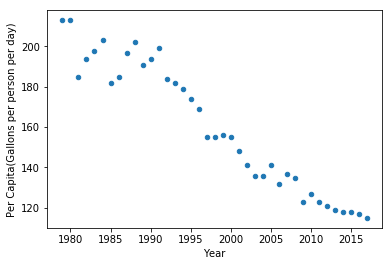

In [77]:
data1.plot(x="Year", y="Per Capita(Gallons per person per day)", kind='scatter')

Plot of the per capita water consumption in New York City throughout the years from 1980 to 2015. It can be seen that the consumption has significantly decreased and a linear model can probably describe the scenario.

In [78]:
url = 'https://data.cityofnewyork.us/resource/waf7-5gvc.json'

In [79]:
data_json = pd.read_json(url)

In [95]:
data_json.head(8)

,City Population,Total Water consumption per day(in million gallons),Consumption per capita(in gallons),Year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


In [84]:
data_json.rename(columns = {'new_york_city_population':'City Population', 
               'nyc_consumption_million_gallons_per_day':'Total Water consumption per day(in million gallons)', 
               'per_capita_gallons_per_person_per_day': 'Consumption per capita(in gallons)', 'year': 'Year'}, inplace=True)

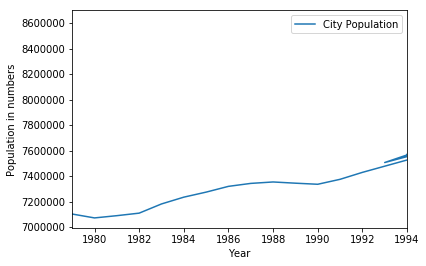

In [98]:
fig = plt.figure(figsize=(50,30))
plot1 = data_json.plot(x='Year', y='City Population');
plot1.set_ylabel("Population in numbers");
fig.show(plot1)

Population of NYC can be seen increasing from the graph from around 7.1 million in 1979 to 7.6 million in 1994. Graph for further years is not shown as there is an inconsistency in the json file of the dataset.

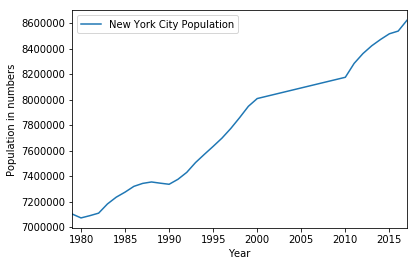

In [101]:
plot1_1 = data.plot(x='Year', y='New York City Population')
plot1_1.set_ylabel("Population in numbers");

Here the full graph of the population is shown for 1979-2017.

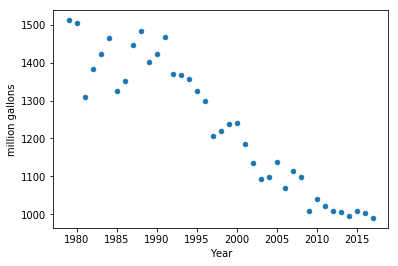

In [104]:
plot2 = data_json.plot(x='Year', y='Total Water consumption per day(in million gallons)', kind='scatter');
plot2.set_ylabel("million gallons");
fig.show(plot2)

Total water consumption(in million gallons) per day in the city.

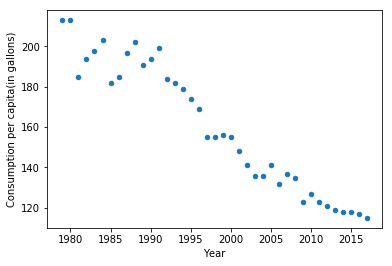

In [103]:
plot3 = data_json.plot(x='Year', y='Consumption per capita(in gallons)', kind='scatter');
#plot3.set_ylabel("gallons");

Consumption per capita (in gallons)